In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Print shapes to confirm data loading
print(f"Features (X): {X.shape}")
print(f"Labels (y): {y.shape}")


Features (X): (150, 4)
Labels (y): (150,)


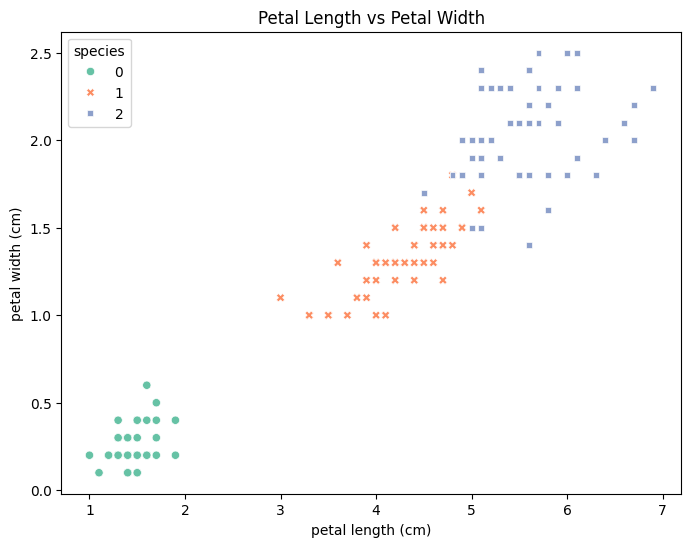

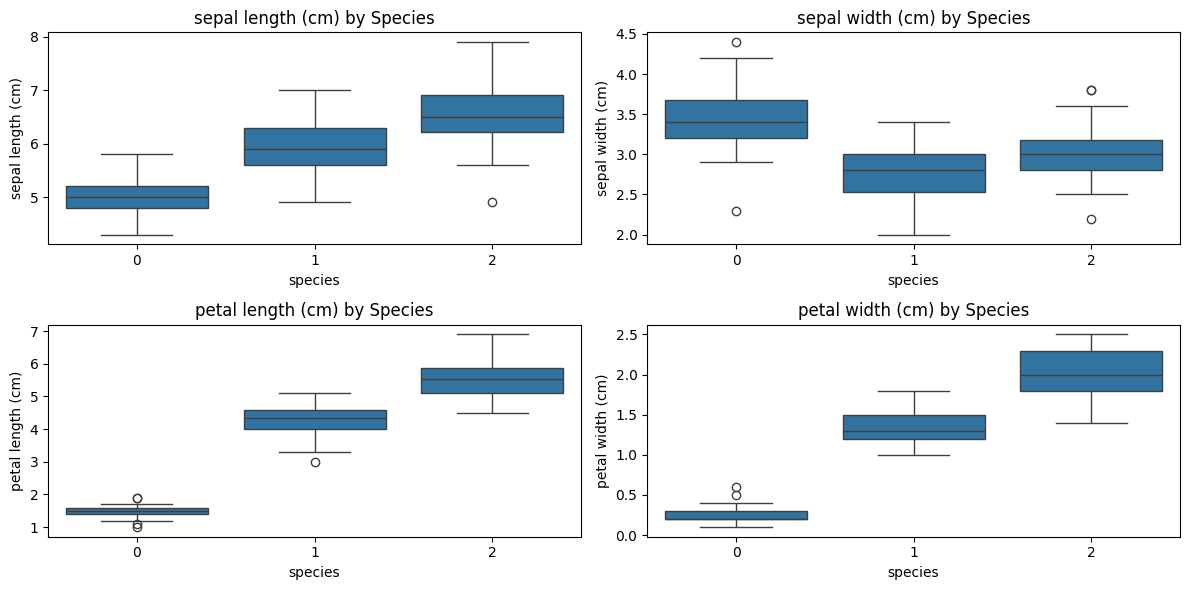

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris_df,
    x=iris.feature_names[2],  # Petal length
    y=iris.feature_names[3],  # Petal width
    hue='species',
    style='species',
    palette='Set2'
)
plt.title("Petal Length vs Petal Width")
plt.show()

plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)       


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)      

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 

new_flower = [[6.2, 2.8, 4.5, 1.5]]  

new_flower_scaled = scaler.transform(new_flower)

# Predict the species using KNN model
prediction = knn.predict(new_flower_scaled)

species = iris.target_names[prediction[0]]
print("Predicted Species:", species)


Predicted Species: versicolor
